In [2]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import is_numeric_dtype
from datetime import datetime, timedelta
import requests

pd.set_option('display.max_colwidth', None)

In [3]:
SUBGRAPH_API_URL = "http://192.168.1.64:8000/subgraphs/name/papercliplabs/0x-protocol-mainnet-full"

sg = Subgrounds()

zero_ex = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())

TIMESTAMP_NAME = "timestamp"
ALL_ENTRIES = 100000000

2024-01-23


In [4]:
whitelist_addresses = [
    "0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee",
        "0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2", # WETH
        "0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48", # USDC
        "0x6B175474E89094C44Da98b954EedeAC495271d0F", # DAI
        "0xdAC17F958D2ee523a2206206994597C13D831ec7", # USDT
        "0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599", # WBTC
        "0x7D1AfA7B718fb893dB30A3aBc0Cfc608AaCfeBB0", # MATIC
        "0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2", # MKR
        "0xc00e94cb662c3520282e6f5717214004a7f26888", # COMP
        "0x514910771af9ca656af840dff83e8264ecf986ca", # LINK
        "0x111111111117dc0aa78b770fa6a738034120c302", # 1INCH
        "0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9", # AAVE
        "0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84", # stETH
        "0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0", # wstETH
        "0xc944E90C64B2c07662A292be6244BDf05Cda44a7", # GRT
        "0x0bc529c00C6401aEF6D220BE8C6Ea1667F6Ad93e", # YFI
        "0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984", # UNI
        "0xae78736Cd615f374D3085123A210448E74Fc6393", # rETH
        "0xBe9895146f7AF43049ca1c1AE358B0541Ea49704", # cbETH
        "0x5A98FcBEA516Cf06857215779Fd812CA3beF1B32", # LDO
        "0xD533a949740bb3306d119CC777fa900bA034cd52", # CRV
        "0xB50721BCf8d664c30412Cfbc6cf7a15145234ad1", # ARB
        "0xc5102fE9359FD9a28f877a67E36B0F050d81a3CC", # HOP
        "0x92D6C1e31e14520e676a687F0a93788B716BEff5", # DYDX
        "0xC011a73ee8576Fb46F5E1c5751cA3B9Fe0af2a6F", # SNX
]

whitelistVolUsd = 0
for address in whitelist_addresses:
    token = zero_ex.Query.erc20Token(id=address)
    vol = sg.query(token.data.erc20FillInputVolumeUsd)
    whitelistVolUsd += vol


print(whitelistVolUsd)

104107142647.2623


In [5]:
# Fetching all Dapp Node Radar data
startDate = datetime(2020, 6, 11)
addDays = timedelta(days=30)

queryDate = startDate

allResults = []
while queryDate < datetime.now() - addDays:
    url = f"https://apis.dappradar.com/v2/dapps/257/history/volume?chain=ethereum&dateFrom={queryDate.date()}&dateTo={(queryDate + addDays).date()}"
    # resp = requests.get(url, headers = {"accept": "application/json", "x-api-key": "SDthoIiREr7KTZHFAnsJ86M0ChHhzBiE7ksufT9B"})
    # results = np.array(resp.json()["results"])
    # allResults = np.append(allResults, results)
    queryDate += addDays

# np.save('zeroExDappRadarVolumeData.npy', allResults)

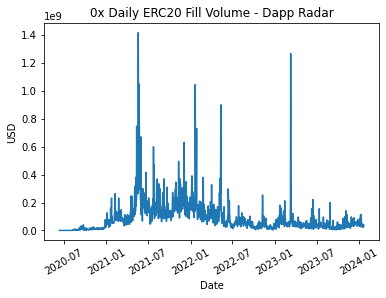

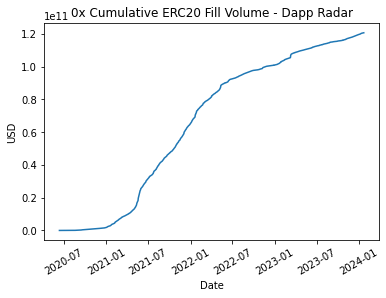

TOTAL VOLUME: 120748469744.83002


In [22]:

# Dapp Node Radar Data Analysis

arr = np.load('zeroExDappRadarVolumeData.npy', allow_pickle=True)
# [{'timestamp': 1591833600, 'date': '2020-06-11', 'value': 148355.45}, ...]

values = np.array(list(map(lambda entry: entry["value"], arr)))
cumulative_values = np.cumsum(values)
dates = np.array(list(map(lambda entry: datetime.strptime(entry["date"], "%Y-%m-%d"), arr)))

plt.plot(dates, values)
plt.xticks(rotation=30)
plt.xlabel("Date")
plt.ylabel("USD")
plt.title("0x Daily ERC20 Fill Volume - Dapp Radar")
plt.show()

plt.plot(dates, cumulative_values)
plt.xticks(rotation=30)
plt.xlabel("Date")
plt.ylabel("USD")
plt.title("0x Cumulative ERC20 Fill Volume - Dapp Radar")
plt.show()

volume = values.sum()
print("TOTAL VOLUME:", volume)